In [4]:
install.packages('nycflights13')
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# STATS 306
## Homework 1: Plotting and data manipulation

- Each problem is worth one or two points for a total of 10. 
- For each problem, enter the R code in the cell provided marked "YOUR SOLUTION HERE".

## Problem 1: Recap of Lecture 1 (2 pts)

**(a)** Write the command to install the package `tidyverse`. For this problem, you can comment out the command using # so that you do not need to reinstall your `tidyverse` package. Then, load the `tidyverse` package into your current environment.  _1/2 point_

In [6]:
# Your solution here
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**(b)** Write the command to get more information on the `trees` data set. What is the `trees` dataset about? Output the `trees` first 6 rows of the data set. _1 point_

In [15]:
# Your solution here
help('trees')
head (trees,6)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


**(c)** How many rows and columns does `trees` have?  _1/2 point_

In [16]:
# Your solution here
nrow(trees)
ncol(trees)


[1] 31

[1] 3

**(d)** To create a scatterplot using `Height` and `Volume` variables in the `trees` data
frame, Professor Terhorst uses the following command

```
ggplot() +
    geom_point(mapping = (x = Height, y = Volume))
```

and R produces an error. 

Fix Professor Terhorst's code and type it below to produce a scatterplot. Output your results.  _1 point_

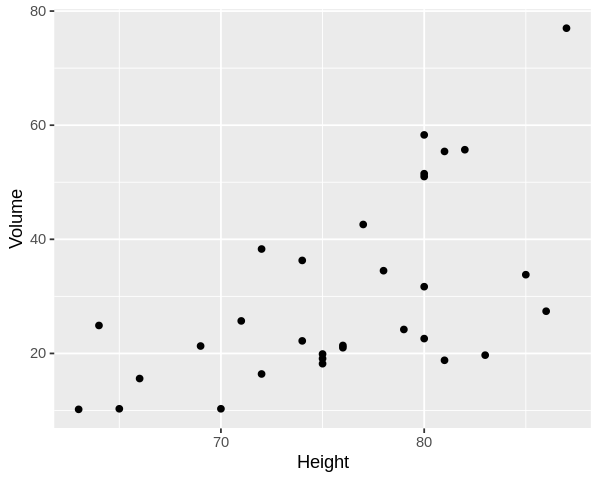

In [21]:
# Your solution here
ggplot(trees) +
    geom_point(aes(x = Height, y = Volume))

## Problem 2: Animals (3 pts)
Problems 2 is based on the `animals` table, which is defined for you in the next cell.

In [67]:
library(MASS)
animals <- as_tibble(MASS::Animals) %>% mutate(species = rownames(MASS::Animals))
glimpse(animals)

Rows: 28
Columns: 3
$ body    <dbl> 1.350, 465.000, 36.330, 27.660, 1.040, 11700.000, 2547.000, 18…
$ brain   <dbl> 8.1, 423.0, 119.5, 115.0, 5.5, 50.0, 4603.0, 419.0, 655.0, 115…
$ species <chr> "Mountain beaver", "Cow", "Grey wolf", "Goat", "Guinea pig", "…


**(a)** How are brain mass and body mass related? Following the examples we saw in Lecture 1, reproduce the following two plots: _2 points_


<img src="http://www-personal.umich.edu/~jonth/images/hw1/fig1.png" width="500" />
<img src="http://www-personal.umich.edu/~jonth/images/hw1/fig2.png" width="500" />

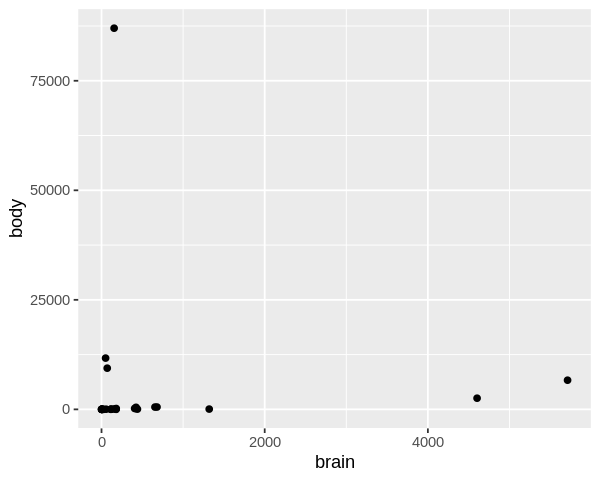

In [56]:
# Your solution here
ggplot(animals, aes(x = brain, y = body)) +
  geom_point()
 

**(b)**
The preceding plot indicates that the log of brain mass is linearly related to the log of body mass. Check this by computing the correlation of brain mass with body mass, and compare that with the correlation between the logs of those two quantities. (*Hint*: R contains a built-in function for computing the correlation of two vectors.) _1 point_

In [87]:
# Your solution here
cor.test(animals$brain, animals$body)
cor.test(log(animals$brain),log(animals$body))


	Pearson's product-moment correlation

data:  animals$brain and animals$body
t = -0.027235, df = 26, p-value = 0.9785
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3776655  0.3684700
sample estimates:
         cor 
-0.005341163 



	Pearson's product-moment correlation

data:  log(animals$brain) and log(animals$body)
t = 6.3451, df = 26, p-value = 1.017e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5730723 0.8929041
sample estimates:
      cor 
0.7794935 


## Problem 3: Flights (3 pts)
This problem looks at the `flights` dataset, which was already loaded at the begginning of this notebook.

**(a)** The following command lists the top six destinations in this dataset:

In [88]:
dest_top6 <- count(flights, dest) %>% top_n(6) %>% print

Selecting by n


# A tibble: 6 × 2
  dest      n
  <chr> <int>
1 ATL   17215
2 BOS   15508
3 CLT   14064
4 LAX   16174
5 MCO   14082
6 ORD   17283


Use `filter()` to subset the flights table down to only those for the top six destinations. You should end up with a table that has 94,326 rows, the first ten of which look like:  _1/2 point_

    # A tibble: 94,326 × 19
        year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
       <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
     1  2013     1     1      554            600        -6      812            837
     2  2013     1     1      554            558        -4      740            728
     3  2013     1     1      557            600        -3      838            846
     4  2013     1     1      558            600        -2      753            745
     5  2013     1     1      558            600        -2      924            917
     6  2013     1     1      559            559         0      702            706
     7  2013     1     1      600            600         0      837            825
     8  2013     1     1      606            610        -4      837            845
     9  2013     1     1      608            600         8      807            735
    10  2013     1     1      615            615         0      833            842
    # … with 94,316 more rows, and 11 more variables: arr_delay <dbl>,
    #   carrier <chr>, flight <int>, tailnum <chr>, origin <chr>, dest <chr>,
    #   air_time <dbl>, distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>

In [134]:
# Your solution here
flights %>% filter(dest =="ATL"|dest =="BOS"|dest =="CLT"|dest =="LAX"|dest =="MCO"|dest =="ORD")
#flight <- flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00
2013,1,1,559,559,0,702,706,-4,B6,1806,N708JB,JFK,BOS,44,187,5,59,2013-01-01 05:00:00
2013,1,1,600,600,0,837,825,12,MQ,4650,N542MQ,LGA,ATL,134,762,6,0,2013-01-01 06:00:00
2013,1,1,606,610,-4,837,845,-8,DL,1743,N3739P,JFK,ATL,128,760,6,10,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00


**(b)** Using the table you created in part (a), recreate the following plot showing the density of arrival delays for the top six destinations: _2 points_

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob_3b.png" width="600" />

Warning message:
“Removed 2234 rows containing non-finite values (`stat_density()`).”


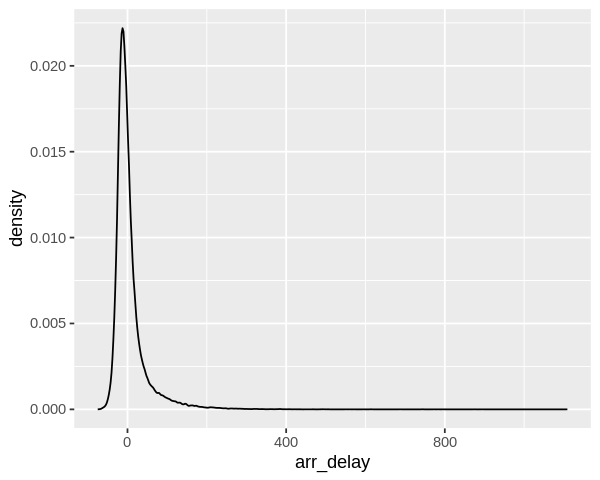

In [135]:
# Your solution here
  ggplot(flight, aes(x=arr_delay)) + 
  geom_density()


**(c)** Adjust the plot from part (b) to recreate the following plot, which only shows flights which had an arrival delay of $\pm$ 1 hour: _1/2 point_

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob_3c.png" width="600" />

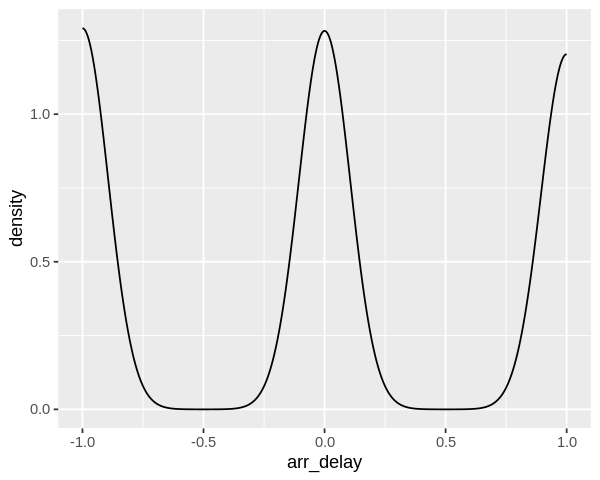

In [170]:
# Your solution here
data_subset<-filter(flights,abs(arr_delay) <= 1)
ggplot(data_subset, aes(x=arr_delay)) + 
  geom_density()

## Problem 4: Challenge Problem (2 pts)

Each problem set will feature one or two questions that go a bit beyond what we have covered in lab and lecture. The goal of these is for you learn how to use online resources (R's help, Google, Stack Overflow, etc.) to solve programming challenges that you have not encountered before. This is an important skill which you will use constantly as data scientists in the real world.

Load the `diamonds` data set, and use it to reproduce the following box-and-whisker plot which shows the distribution of diamond price as a function of the quality of its `cut`.

<img src="http://www-personal.umich.edu/~jonth/images/hw1/prob4.png" width="500" />

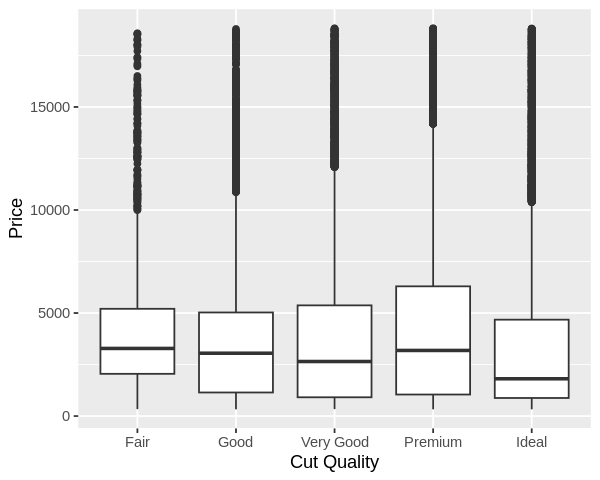

In [158]:
# Your solution here

# load ggplot2 library
library(ggplot2)

# load the diamonds dataset
data(diamonds)

# create the box-and-whisker plot
ggplot(diamonds, aes(x = cut, y = price)) +
  geom_boxplot() +
  xlab("Cut Quality") +
  ylab("Price")